### import data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel('Data1.xlsx', index_col=0, header=[0,1]) # 325 X 40
df2 = pd.read_excel('Data2.xlsx', index_col=0, header=[0,1]) # 325 X 45

# join to data frames
df = df1.merge(df2, left_index=True, right_index=True) # 325 X 85

### prepare data

In [78]:
# create a new item NWP/GWP
df_nwp = df['NWP (£m) ']
df_gwp = df['GWP (£m)']
df_nwp_gwp = df_nwp / df_gwp
df_nwp_gwp.columns = [['NWP_GWP', 'NWP_GWP','NWP_GWP','NWP_GWP','NWP_GWP'],['2016YE', '2017YE','2018YE','2019YE','2020YE']]

In [79]:
# merge with df
df = df.merge(df_nwp_gwp, left_index=True, right_index=True) # 325 X 90

In [80]:
check_for_nan = df.isnull().values.any()
print (check_for_nan)
df = df.fillna(0)

True


In [81]:
item_list = []
for i in range(len(df.columns)):
    if df.columns[i][0] not in item_list:
        item_list.append(df.columns[i][0])
    
item_list = tuple(item_list)
item_list

('NWP (£m) ',
 'SCR (£m)',
 'EoF for SCR (£m)',
 'SCR coverage ratio',
 'GWP (£m)',
 'Total assets (£m)',
 'Total liabilities (£m)',
 'Excess of assets over liabilities (£m) [= equity]',
 'Gross claims incurred (£m)',
 'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)',
 'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)',
 'Pure net claims ratio',
 'Net expense ratio',
 'Net combined ratio',
 'Pure gross claims ratio',
 'Gross expense ratio',
 'Gross combined ratio',
 'NWP_GWP')

### clean data

In [82]:
# delete rows with more than 3 zeros or year 2020 has 0 value in the column of interest
def clean_column(df, column_name):
    col = column_name
    for index in df.index:
        unique = df[[col]].loc[index].nunique()
        percentage = float(unique) / len(df[[col]].loc[index])
        if percentage < 0.8 or df[[col]].loc[index][-1] == 0.0:
            print ('Deleted: ', index, df[[col]].loc[index])
            df.drop(index, axis=0, inplace=True)
    return df

In [83]:
df = clean_column(df, 'GWP (£m)')
df = clean_column(df, 'NWP (£m) ')
df = clean_column(df, 'SCR coverage ratio')
df = clean_column(df, 'Net combined ratio')
df = clean_column(df, 'Gross claims incurred (£m)')
df = clean_column(df, 'NWP_GWP')
#df[['Net combined ratio']]

Deleted:  Firm 1 GWP (£m)  2016YE    1409.484796
          2017YE       0.000000
          2018YE       0.000000
          2019YE       0.000000
          2020YE       0.000000
Name: Firm 1, dtype: float64
Deleted:  Firm 8 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 8, dtype: float64
Deleted:  Firm 11 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 11, dtype: float64
Deleted:  Firm 12 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 12, dtype: float64
Deleted:  Firm 16 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 16, dtype: float64
Deleted:  Firm 17 GWP (£m)  2016YE    2642.301221
          2017YE    3138.881596
          2018YE    1437.636873
          

Deleted:  Firm 154 GWP (£m)  2016YE    298.297745
          2017YE    340.623519
          2018YE    304.654017
          2019YE      0.000000
          2020YE      0.000000
Name: Firm 154, dtype: float64
Deleted:  Firm 155 GWP (£m)  2016YE    38.823129
          2017YE     0.000000
          2018YE     0.000000
          2019YE     0.000000
          2020YE     0.000000
Name: Firm 155, dtype: float64
Deleted:  Firm 160 GWP (£m)  2016YE    0.000000
          2017YE    0.022442
          2018YE    0.000000
          2019YE    0.000000
          2020YE    0.000000
Name: Firm 160, dtype: float64
Deleted:  Firm 162 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 162, dtype: float64
Deleted:  Firm 163 GWP (£m)  2016YE    0.543378
          2017YE    0.473352
          2018YE    0.424607
          2019YE    0.419136
          2020YE    0.000000
Name: Firm 163, dtype: float64
Deleted:  Firm 164 GWP (£m)  2016YE

Deleted:  Firm 318 GWP (£m)  2016YE    1150.849218
          2017YE    1056.551606
          2018YE    1113.254180
          2019YE     968.312938
          2020YE       0.000000
Name: Firm 318, dtype: float64
Deleted:  Firm 319 GWP (£m)  2016YE    0.000964
          2017YE    0.000000
          2018YE    0.000964
          2019YE    0.000000
          2020YE    0.000000
Name: Firm 319, dtype: float64
Deleted:  Firm 320 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 320, dtype: float64
Deleted:  Firm 323 GWP (£m)  2016YE    0.0
          2017YE    0.0
          2018YE    0.0
          2019YE    0.0
          2020YE    0.0
Name: Firm 323, dtype: float64
Deleted:  Firm 325 GWP (£m)  2016YE    477.737541
          2017YE    439.224098
          2018YE    479.519316
          2019YE    410.711127
          2020YE      0.000000
Name: Firm 325, dtype: float64
Deleted:  Firm 142 NWP (£m)   2016YE    0.0
      

Deleted:  Firm 77 Net combined ratio  2016YE    0.0
                    2017YE    0.0
                    2018YE    0.0
                    2019YE    0.0
                    2020YE    0.0
Name: Firm 77, dtype: float64
Deleted:  Firm 78 Net combined ratio  2016YE    0.0
                    2017YE    0.0
                    2018YE    0.0
                    2019YE    0.0
                    2020YE    0.0
Name: Firm 78, dtype: float64
Deleted:  Firm 82 Net combined ratio  2016YE    0.0
                    2017YE    0.0
                    2018YE    0.0
                    2019YE    0.0
                    2020YE    0.0
Name: Firm 82, dtype: float64
Deleted:  Firm 93 Net combined ratio  2016YE    0.0
                    2017YE    0.0
                    2018YE    0.0
                    2019YE    0.0
                    2020YE    0.0
Name: Firm 93, dtype: float64
Deleted:  Firm 99 Net combined ratio  2016YE        0.000000
                    2017YE   -46116.696842
                    2018

Deleted:  Firm 274 Net combined ratio  2016YE    0.0
                    2017YE    0.0
                    2018YE    0.0
                    2019YE    0.0
                    2020YE    0.0
Name: Firm 274, dtype: float64
Deleted:  Firm 276 Net combined ratio  2016YE    0.0
                    2017YE    0.0
                    2018YE    0.0
                    2019YE    0.0
                    2020YE    0.0
Name: Firm 276, dtype: float64
Deleted:  Firm 279 Net combined ratio  2016YE    0.953482
                    2017YE    1.050864
                    2018YE    1.113926
                    2019YE    0.000000
                    2020YE    0.000000
Name: Firm 279, dtype: float64
Deleted:  Firm 284 Net combined ratio  2016YE      0.000000
                    2017YE      0.000000
                    2018YE      0.000000
                    2019YE    435.578414
                    2020YE    906.307872
Name: Firm 284, dtype: float64
Deleted:  Firm 285 Net combined ratio  2016YE    0.888116
  

In [84]:
# delete rows whose value should be within 0 and 1
def clean_ratio_in_0_1(df, column_name):
    col = column_name
    for index in df.index:
        median = df[[col]].loc[index].median() # take the median
        if median > 1.0 or median < 0.0:
            print ('Deleted: ', index, df[[col]].loc[index])
            df.drop(index, axis=0, inplace=True)
    return df

In [85]:
df = clean_ratio_in_0_1(df, 'Net combined ratio')
df = clean_ratio_in_0_1(df, 'NWP/GWP')
#df

Deleted:  Firm 4 Net combined ratio  2016YE    1.080209
                    2017YE    1.707291
                    2018YE    2.119041
                    2019YE    2.586257
                    2020YE   -3.408470
Name: Firm 4, dtype: float64
Deleted:  Firm 5 Net combined ratio  2016YE    0.755996
                    2017YE    1.569344
                    2018YE    1.522143
                    2019YE    1.309036
                    2020YE    1.062102
Name: Firm 5, dtype: float64
Deleted:  Firm 34 Net combined ratio  2016YE    0.000000
                    2017YE    3.097137
                    2018YE    1.511077
                    2019YE    1.309232
                    2020YE    1.655531
Name: Firm 34, dtype: float64
Deleted:  Firm 35 Net combined ratio  2016YE    1.095150
                    2017YE    1.135042
                    2018YE    0.910840
                    2019YE    0.951040
                    2020YE    1.072938
Name: Firm 35, dtype: float64
Deleted:  Firm 40 Net combined r

KeyError: "['NWP/GWP'] not in index"

### Anomaly Detection with Isolation Forest

#### create training data

In [86]:
# generate random floating point values
from random import seed
from random import random

# seed random number generator
seed(1)

# create training samples
X_train = []

# generate random numbers between 0-1
for _ in range(100):
    value = random()
    X_train.append(value)

    # generate random numbers anomaly
for _ in range(5):
    value1 = random() * 10
    value2 = random() * -10
    X_train.append(value1)
    X_train.append(value2)

X_train = np.reshape(X_train, (-1, 1))
#X_train

#### create isolation forest function

In [87]:
from sklearn.ensemble import IsolationForest

def check_outlier_iso_forest(df, column_name):
    col = column_name
    clf = IsolationForest(random_state=0).fit(X_train) #train the model
    for index in df.index:
        X_test = df[[col]].loc[index].tolist()
        X_test = np.reshape(X_test, (-1, 1))

        result = clf.predict(X_test)
        score = result.sum()
        if score < 3: # more than two outliers
            print ('Deleted: ', index, df[[col]].loc[index], result, score)
            df.drop(index, axis=0, inplace=True)
    return df

In [88]:
df = check_outlier_iso_forest(df, 'Net combined ratio')
df = check_outlier_iso_forest(df, 'NWP/GWP')
#df[['NWP/GWP']]

Deleted:  Firm 10 Net combined ratio  2016YE    1.101710
                    2017YE    1.239792
                    2018YE    0.975677
                    2019YE    0.996915
                    2020YE    0.945358
Name: Firm 10, dtype: float64 [-1 -1  1  1  1] 1
Deleted:  Firm 14 Net combined ratio  2016YE    0.858600
                    2017YE    1.159413
                    2018YE    0.913821
                    2019YE    0.958877
                    2020YE    1.087818
Name: Firm 14, dtype: float64 [ 1 -1  1  1 -1] 1
Deleted:  Firm 53 Net combined ratio  2016YE    0.982635
                    2017YE    0.832396
                    2018YE    1.045445
                    2019YE    0.969188
                    2020YE    1.037244
Name: Firm 53, dtype: float64 [ 1  1 -1  1 -1] 1
Deleted:  Firm 73 Net combined ratio  2016YE    0.000000
                    2017YE    0.000000
                    2018YE    1.433751
                    2019YE    0.944492
                    2020YE    1.112066
N

KeyError: "['NWP/GWP'] not in index"

### select best firm

In [89]:
# select the largest n rows based on mean values
def get_large(df, column_name, n):
    col = column_name
    df_mean = df[[col]].mean(axis=1).to_frame(name = 'mean') # create mean df
    df_large = df_mean.nlargest(n, 'mean') # select largest 
    df_large_selected = df.loc[df_large.index] # select from df
    return df_large_selected

In [104]:
df = get_large(df, 'GWP (£m)', 10)
df[['Gross claims incurred (£m)']]
df[['GWP (£m)']]

GWP (£m)                                                        
                2016YE        2017YE        2018YE        2019YE        2020YE
Firm 247  13589.808933  24202.653436  22694.940614  10624.480076   9961.520679
Firm 105  31888.235449  12949.709892  12891.099350  10956.567589   5811.661920
Firm 311   2210.966849  11493.619715  16553.861172  18988.452773  19180.016479
Firm 199     28.296116   8808.031930  10211.520015   9756.349462   9149.583691
Firm 234   3408.348892   4205.773242   3617.072335   3633.996397   3430.085703
Firm 6     1918.425581   3434.087947   2580.341492   4480.124182   4452.508624
Firm 107   3154.857507   3268.633490   3094.958017   3086.413812   3064.592365
Firm 80    2291.735342   2297.041645   2296.128641   2243.987766   2079.515659
Firm 221   1385.142897   1441.852679   1493.816376   1526.361149   1500.735245
Firm 87     393.057035    415.448833    465.528405    486.237371    439.866084

In [102]:
def plot_xfirm(df, ylog, ymin, ymax):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax = df.T.boxplot()
    ax.set_ylabel(df.columns[0][0])
    
    if ymin == None and ymax == None:
        pass
    else:
        ax.set_ylim([ymin, ymax])
    
    if ylog == True:
        ax.set_yscale('log')
        
    plt.xticks(rotation=90)
    plt.title(df.columns[0][0])
    plt.tight_layout()
    plt.savefig('fig_' + str(df.columns[0][0]) + '.png', dpi=900)
    plt.show()

In [97]:
def plot_xyear(df, ylog, ymin, ymax):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    year = ['2016', '2017', '2018', '2019', '2020']
    ax.set_xlabel('Year')
    ax.set_ylabel(df.columns[0][0])
    
    for index in df.index:
        ax.plot(year, df.loc[index], marker = 'o', label=index)

    if ymin == None and ymax == None:
        pass
    else:
        ax.set_ylim([ymin, ymax])
    
    if ylog == True:
        ax.set_yscale('log')    
        
    plt.xticks()
    plt.title(df.columns[0][0])
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.tight_layout()
    plt.savefig('fig_' + str(df.columns[0][0]) + '.png', dpi=900)
    plt.show()

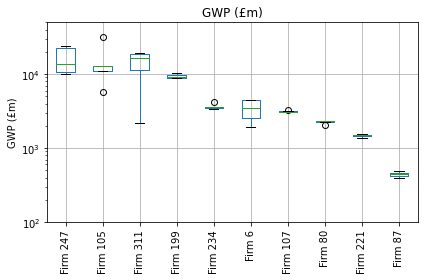

In [108]:
plot_xfirm(df[['GWP (£m)']], ylog=True, ymin=1e2, ymax=5e4)

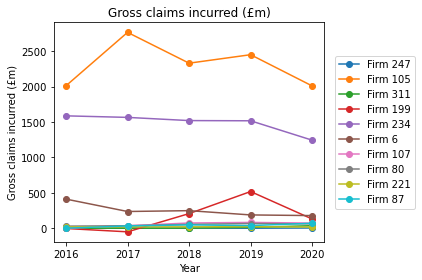

In [110]:
plot_xyear(df[['Gross claims incurred (£m)']], ylog=False, ymin=None, ymax=None)

In [113]:
df[['Gross claims incurred (£m)']]
df[['NWP_GWP']]

NWP_GWP                                        
            2016YE    2017YE    2018YE    2019YE    2020YE
Firm 247  0.984380  0.992923  0.990343  1.000000  1.000000
Firm 105  0.980790  0.896902 -0.006083  0.980164  0.798610
Firm 311 -0.842274  0.850692  0.725460  0.669849  0.564701
Firm 199  0.239155  0.997706  0.998048  0.998237  0.998328
Firm 234  0.780687  0.824345  0.775449  0.800548  0.763866
Firm 6    0.952238  0.885427  0.633334  0.688059  0.683183
Firm 107  0.937007  0.938563  0.930459  0.932595  0.927354
Firm 80   0.955184  0.956739  0.961123  0.961840  0.950261
Firm 221  0.979804  0.982491  0.982016  0.981537  0.981142
Firm 87   0.731469  0.878053  0.842204  0.839025  0.778885